# 0.0 Initial

## 0.1. Import

In [104]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from matplotlib import pyplot          as plt
import matplotlib.pyplot as plt

from IPython.display       import Image

## 0.2. Helper Functions

In [105]:
def bmi (height, weight):
    bmi = weight/((height/100)**2)
    return bmi

## 0.3. Loading Data

In [106]:
df_raw = pd.read_csv('cardio_train.csv', low_memory=False)

In [107]:
df_raw

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# 1.0. Data Description

In [108]:
df1 = df_raw.copy()

## 1.1. Data Dimensions

In [109]:
print('Number of columns:', format(df1.shape[1]))
print('Number of rows:', format(df1.shape[0]))

Number of columns: 13
Number of rows: 70000


## 1.2. Data Types

In [110]:
df1.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

## 1.3. Check NA

In [111]:
df1.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 1.4. Unit change

In [112]:
#age (int)
df1['age'] = (df1['age']/365).astype(int)

#weight (int)
df1['weight'] = df1['weight'].astype(int)

#plt.subplot(1,3,1)
#sns.boxplot(x='age', data=df1)

## 1.5. Descriptive Statiscal

In [113]:
#central tendency - mean, median
ct1 = pd.DataFrame(df1.apply(np.mean)).T
ct2 = pd.DataFrame(df1.apply(np.median)).T

#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(df1.apply(min)).T
d2 = pd.DataFrame(df1.apply(max)).T
d3 = pd.DataFrame(df1.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(df1.apply(np.std)).T
d5 = pd.DataFrame(df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(df1.apply(lambda x: x.kurtosis())).T

#concatenate
m = pd.concat([d1,d2,d3,ct1,ct2,d4,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,0.0,99999.0,99999.0,49972.419900,50001.5,28851.096242,-0.001278,-1.198374
1,age,29.0,64.0,35.0,52.840671,53.0,6.766725,-0.305744,-0.818981
2,gender,1.0,2.0,1.0,1.349571,1.0,0.476835,0.630960,-1.601935
3,height,55.0,250.0,195.0,164.359229,165.0,8.210068,-0.642187,7.943653
4,weight,10.0,200.0,190.0,74.204329,72.0,14.395850,1.012030,2.586746
5,ap_hi,-150.0,16020.0,16170.0,128.817286,120.0,154.010319,85.296214,7580.074738
6,ap_lo,-70.0,11000.0,11070.0,96.630414,80.0,188.471184,32.114083,1425.914585
7,cholesterol,1.0,3.0,2.0,1.366871,1.0,0.680245,1.587123,0.993901
8,gluc,1.0,3.0,2.0,1.226457,1.0,0.572266,2.397462,4.294377
9,smoke,0.0,1.0,1.0,0.088129,0.0,0.283482,2.905867,6.444250


# 2.0. Feature Engineering

In [114]:
df2 = df1.copy()

**Identification**

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code | 1 - women | 2 - men



**Review of Systems**

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

**Habits**

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

**Target Variable**

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

## 2.1 Mind Map Hypothesis

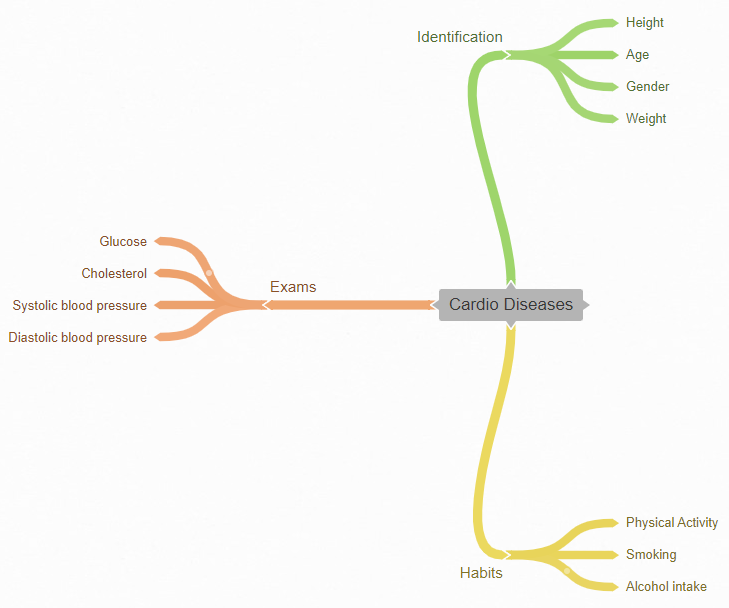

In [115]:
Image('CCD.png')

## 2.2 Hypothesis Creation

### 2.1.1 Identification Hypothesis

**1.** People over 50 are 20% more likely to have CVDs

**2.** People shorter than 170 cm (5'7'') have a 5% chance of CVDs

**3.** Men are 30% more likely than women to develop a CVD

**4.** People over 100 kg (220 lb) have a 40% chance of having a CVD

**5.** People with a BMI above 30 (obese class I) have a 25% chance of having a CVD

### 2.1.2 Habits Hypothesis

**1.** People who do not engage in physical activity are 40% more likely to have CDCs

**2.** People who regularly consume alcohol have a 10% chance of having CVD

**3.** People who smoke are 20% more likely to have CVD

### 2.1.3 Exams Hypothesis

**1.** People who have well above normal cholesterol have a 50% chance of having CVD

**2.** People who have well above normal glucose have a 20% chance of having CVD

**3.** People who have high diastolic blood pressure have a 40% chance of having CVD

**4.** People who have high systolic blood pressure have a 40% chance of having CVD

## 2.3. Final Hypothesis

**1.** People over 50 are 20% more likely to have CVDs

**2.** People shorter than 170 cm (5'7'') have a 5% chance of CVDs

**3.** Men are 30% more likely than women to develop a CVD

**4.** People over 100 kg (220 lb) have a 40% chance of having a CVD

**5.** People with a BMI above 30 (obese class I) have a 25% chance of having a CVD

**6.** People who do not engage in physical activity are 40% more likely to have CVDs

**7.** People who regularly consume alcohol have a 10% chance of having CVD

**8.** People who smoke are 20% more likely to have CVD

**9.** People who have well above normal cholesterol have a 50% chance of having CVD

**10.** People who have well above normal glucose have a 20% chance of having CVD

**11.** People who have high blood pressure have a 40% chance of having CVD

## 2.4. Feature Engineering

In [116]:
#BMI
df2['bmi'] = bmi(df2['height'], df2['weight'])

In [217]:
#blood pressure classification
df2['blood_pressure'] = ''

df2['blood_pressure'] = df2.apply(lambda x: '0' if x['ap_hi'] <= 120 and x['ap_lo'] <= 80 else '' 
                                  '1' if (x['ap_hi'] >= 120 and x['ap_hi'] < 129) and (x['ap_lo'] >= 80 and x['ap_lo'] <= 84) else ''
                                  '2' if (x['ap_hi'] >= 130 and x['ap_hi'] < 139) or (x['ap_lo'] >= 85 and x['ap_lo'] <= 89) else ''
                                  '3' if (x['ap_hi'] >= 140 and x['ap_hi'] < 159) or (x['ap_lo'] >= 90 and x['ap_lo'] <= 99) else ''
                                  '4' if (x['ap_hi'] >= 160 and x['ap_hi'] < 179) or (x['ap_lo'] >= 100 and x['ap_lo'] <= 109) else ''
                                  '5' if x['ap_hi'] >= 180 or x['ap_lo'] >= 110 else '', axis=1)

#df2['blood_pressure'] = df2.blood_pressure.convert_objects(convert_numeric=True)

df2['blood_pressure'] = pd.to_numeric(df2['blood_pressure'],errors = 'coerce')

# 3.0. Exploratory Data Analysis

In [219]:
df3 = df2.copy()

## 3.1 Univariate Analysis

### 3.1.1 Response variable

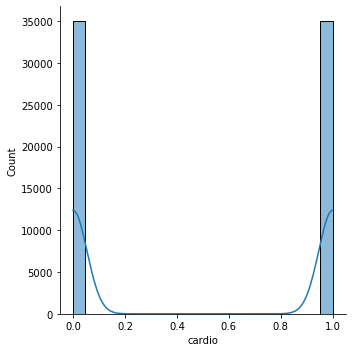

In [119]:
sns.displot(df3['cardio'], kde=True)

### 3.1.2 Numeric variable

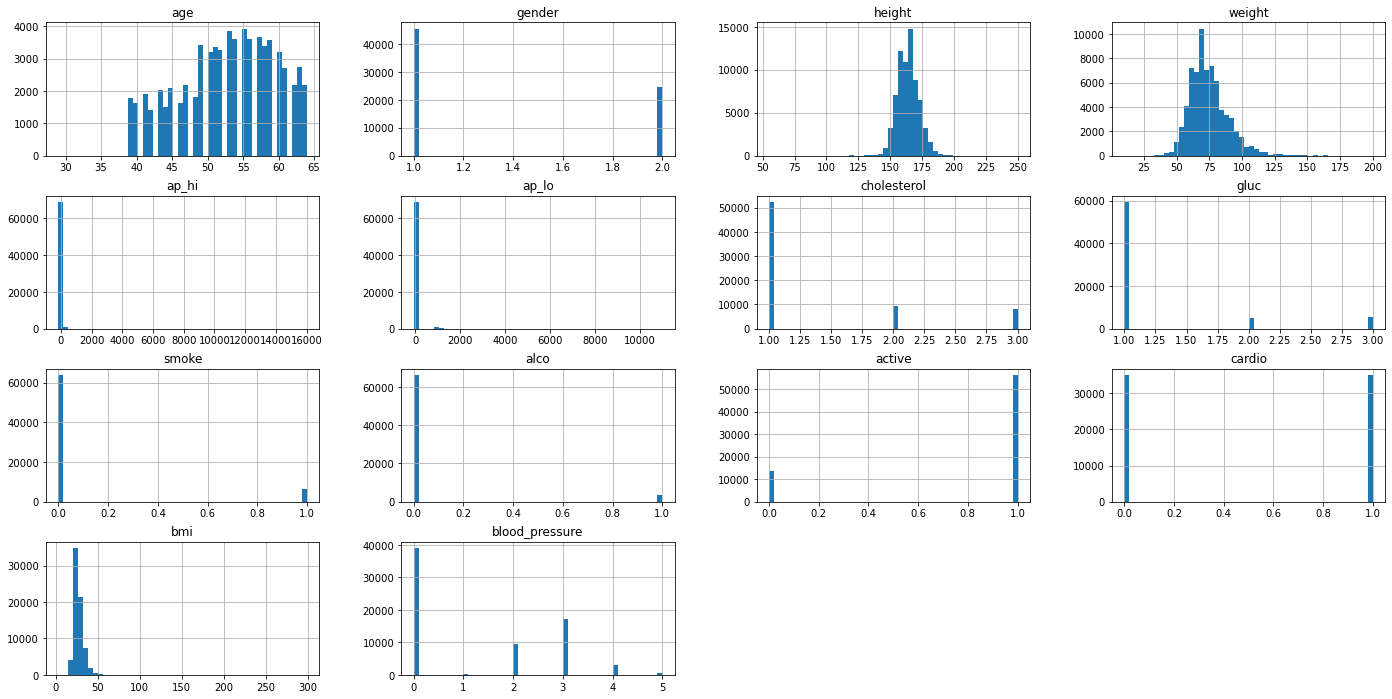

In [222]:
df32 = df3.drop('id', axis=1)
df32.hist(figsize=(24,12), bins=50);

## 3.2. Bivariate Analysis

**1. Between 39 - 64. People over 50 are on average 20% more likely to have CVD**

**TRUE** On average people over 50 are 21% more likely to have CVD. And 63 years old has the highest incidence.

<AxesSubplot:xlabel='age', ylabel='cardio'>

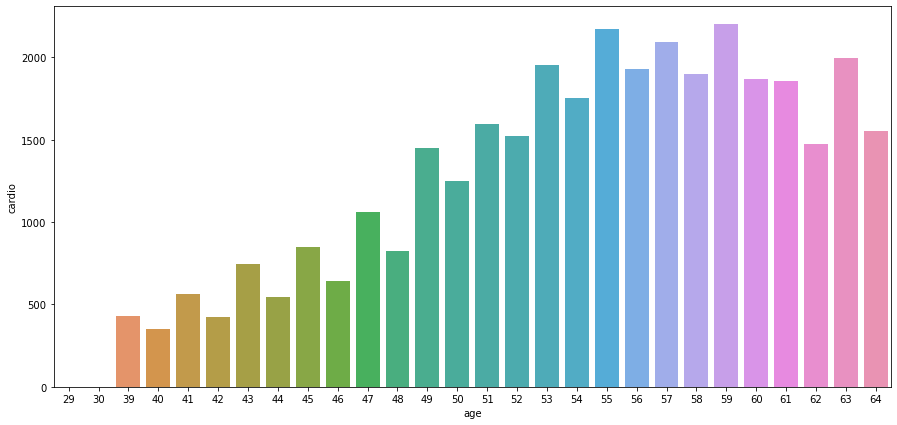

In [121]:
aux1 = df3[['age', 'cardio']].groupby('age').sum().reset_index().rename(columns={0:'total'})
#aux1

fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='age', y='cardio', ax=ax, data=aux1)

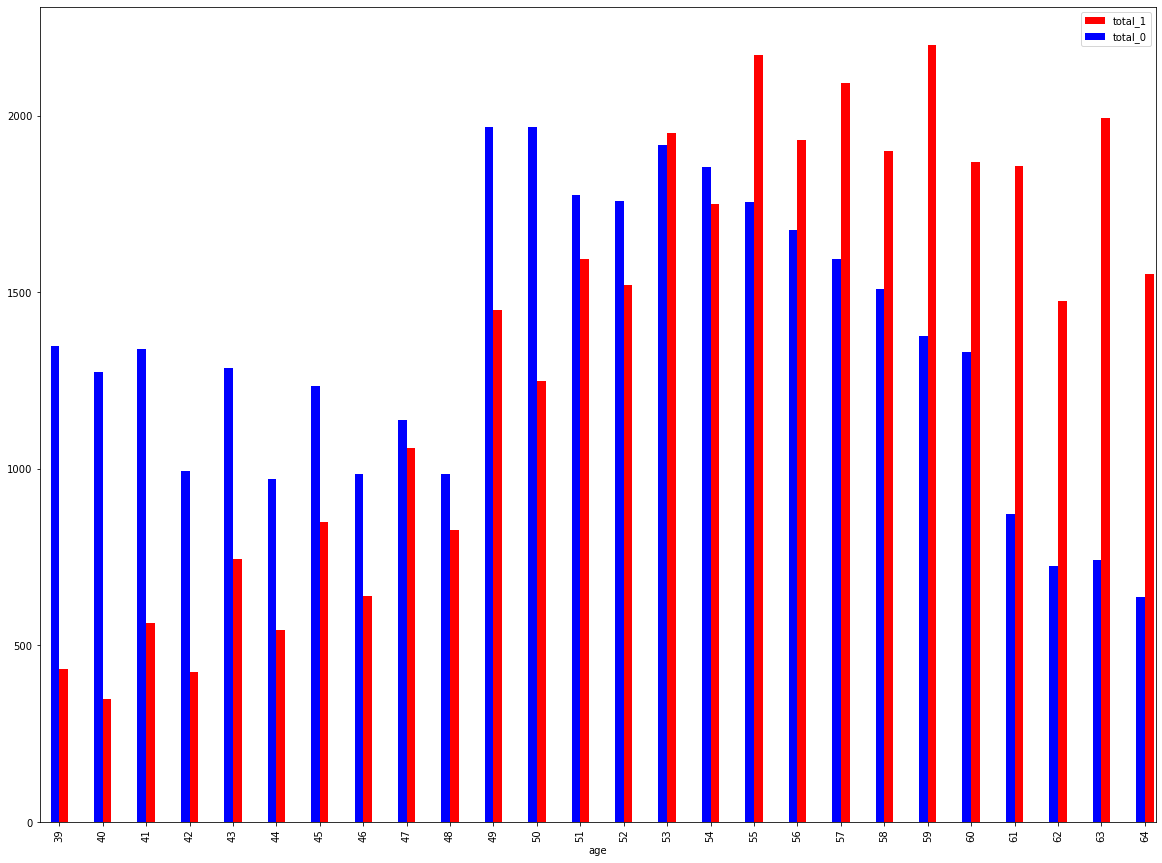

In [122]:
aux1 = df3[(df3['age'] >= 39) & (df3['cardio'] >= 1)]
aux1 = aux1[['age', 'cardio']].groupby('age').size().reset_index().rename(columns={0:'total_1'})
aux1

aux2 = df3[(df3['age'] >= 39) & (df3['cardio'] <= 0)]
aux2 = aux2[['age', 'cardio']].groupby('age').size().reset_index().rename(columns={0:'total_0'})
aux2

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111) # Create matplotlib axes
#ax2 = ax.twinx()

width = 0.2

#aux1.set_index(['cardio','bmi']).plot.bar(figsize=(20,10))
aux1.plot(x='age', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='age', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

In [123]:
aux1 = df3[['age', 'cardio']].groupby(['age','cardio']).size().reset_index().rename(columns={0:'total'})
#aux1

In [124]:
#calculate % people who had CVD
aux1['%_cardio_1'] = ""

j = len(aux1)
for i in range(len(aux1)):
    i=i+1
    if i < j:
        perc = ((aux1['total'][i])/(aux1['total'][i-1]+aux1['total'][i]))*100
        aux1['%_cardio_1'][i] = perc
    else:
        exit

<ipython-input-124-f57475dde67e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['%_cardio_1'][i] = perc


In [125]:
aux1 = aux1[(aux1['cardio'] >=1)]
aux_50 = aux1[(aux1['age'] >= 50)]
aux_50 = pd.DataFrame(aux_50.apply(np.mean)).T
aux_50

aux_49 = aux1[(aux1['age'] < 50)]
aux_49 = pd.DataFrame(aux_49.apply(np.mean)).T
aux_49

m = pd.concat([aux_50, aux_49]).T.reset_index()
m.columns = ['index','over 50','below 50']
m

,index,over 50,below 50
0,age,57.000000,44.000000
1,cardio,1.000000,1.000000
2,total,1806.600000,716.363636
3,%_cardio_1,56.768746,35.831276


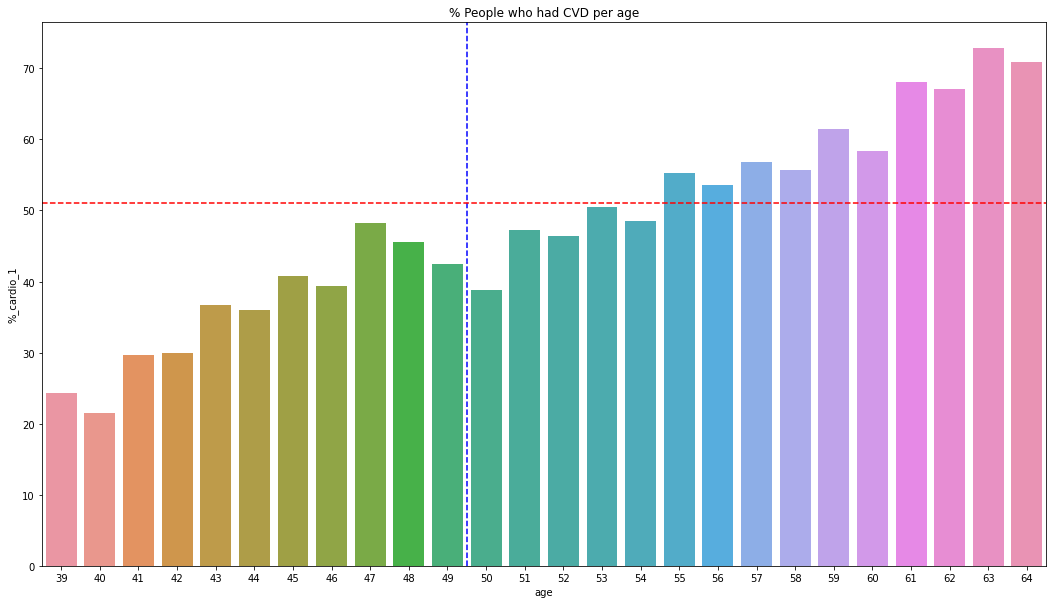

In [126]:
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
#plt.axvline(29.5, 0.0,1.0)
graph = sns.barplot(x='age', y='%_cardio_1', ax=ax, data=aux1)
graph.axvline(10.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(51, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% People who had CVD per age')
plt.show()

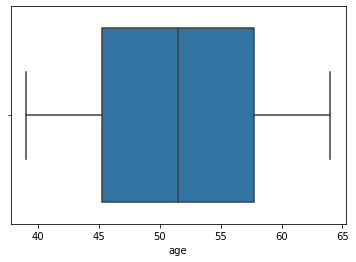

In [127]:
#boxplot age+cardio
sns.boxplot(x='age', data=aux1)
ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

In [128]:
#older than 50
#aux2 = df3[(df3['age'] > 50)]
#aux2 = aux2[['age', 'cardio']].groupby('age').sum().reset_index()
#aux2.sum()
#sns.barplot(x='age', y='count', data=aux1);

In [129]:
#younger than 50
#aux3 = df3[(df3['age'] <= 50)]
#aux3 = aux3[['age', 'cardio']].groupby('age').sum().reset_index()
#aux3.sum()

**2. Between 135 - 193. People shorter than 170 cm (5'7'') have a 5% chance of CVDs**

**FALSE** On average people shorter than 170 cm have 1% more likely to have CVD.

<AxesSubplot:xlabel='height', ylabel='cardio'>

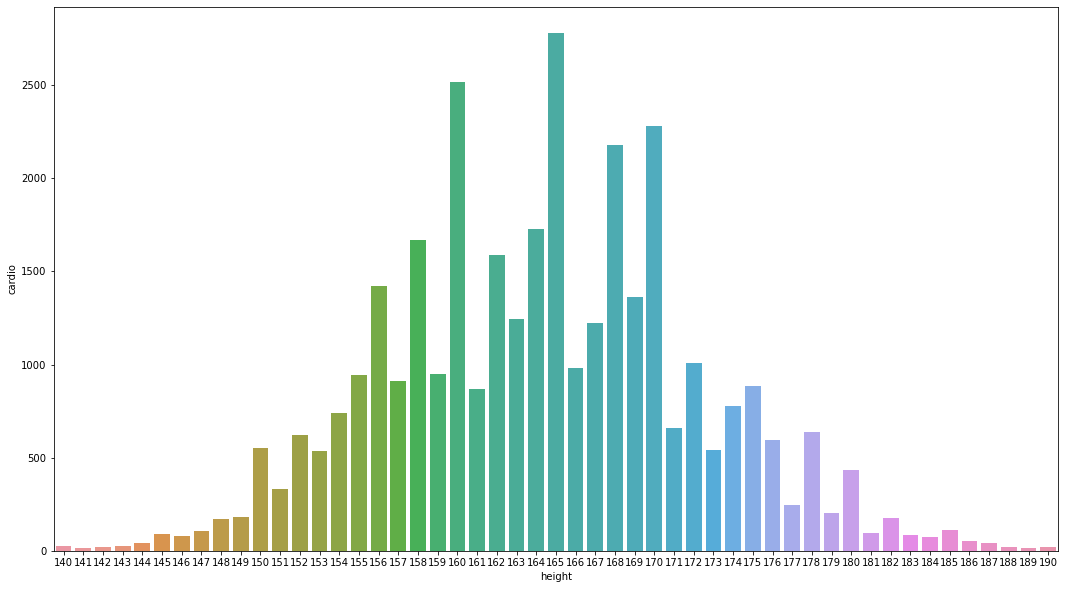

In [130]:
#histogram
aux1 = df3[(df3['height'] >= 140) & (df3['height'] <= 190)]
aux1 = aux1[['height', 'cardio']].groupby('height').sum().reset_index()

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='height', y='cardio', ax=ax, data=aux1)

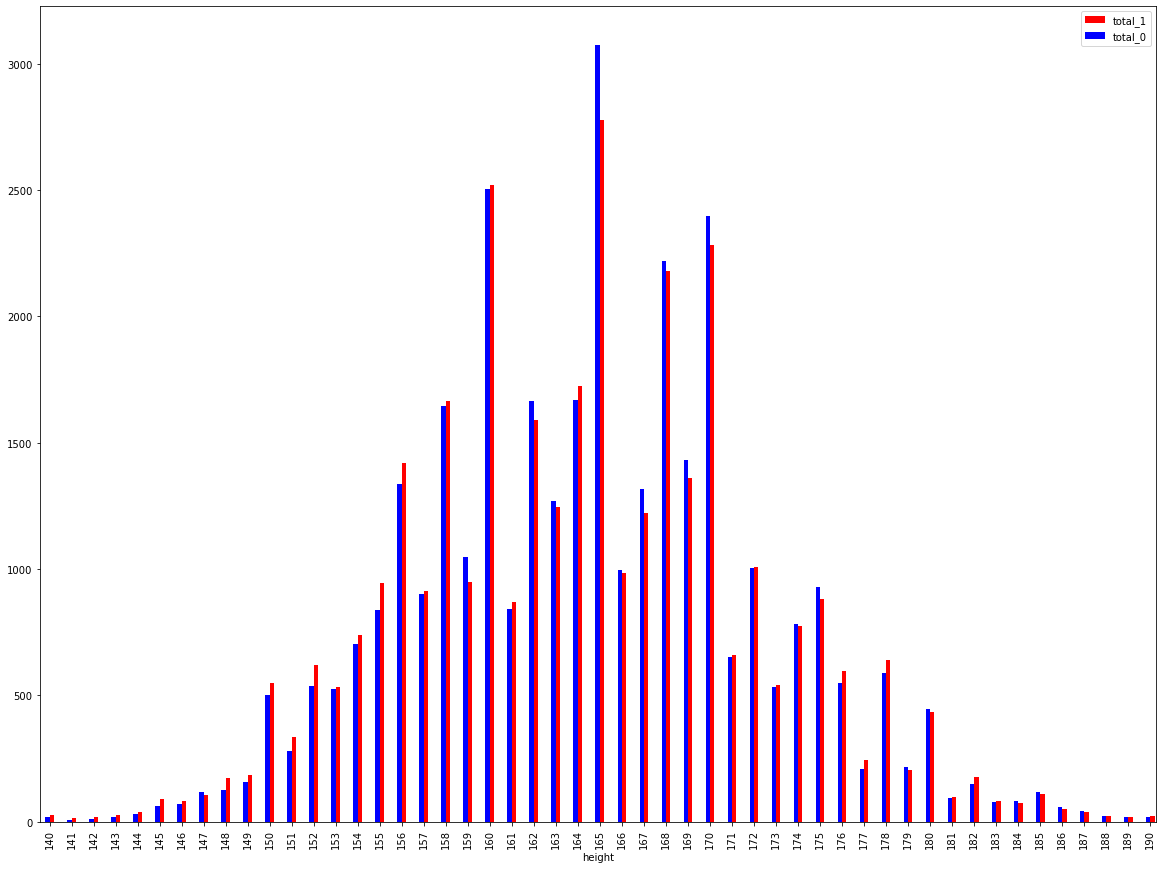

In [131]:
#histogram with and without CVD
aux1 = df3[(df3['cardio'] >= 1) & (df3['height'] >= 140) & (df3['height'] <= 190)]
aux1 = aux1[['height', 'cardio']].groupby('height').size().reset_index().rename(columns={0:'total_1'})
aux1

aux2 = df3[(df3['cardio'] <= 0) & (df3['height'] >= 140) & (df3['height'] <= 190)]
aux2 = aux2[['height', 'cardio']].groupby('height').size().reset_index().rename(columns={0:'total_0'})
aux2

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='height', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='height', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

In [132]:
aux1 = df3[(df3['height'] >= 135) & (df3['height'] <= 193)]
aux1 = aux1[['height', 'cardio']].groupby(['height','cardio']).size().reset_index().rename(columns={0:'total'})
#aux1

In [133]:
#calculate % people who had CVD
aux1['%_cardio_1'] = ""

j = len(aux1)
for i in range(len(aux1)):
    i=i+1
    if i < j:
        perc = ((aux1['total'][i])/(aux1['total'][i-1]+aux1['total'][i]))*100
        aux1['%_cardio_1'][i] = perc
    else:
        exit

<ipython-input-133-f57475dde67e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['%_cardio_1'][i] = perc


In [134]:
#aux1 = aux1[(aux1['cardio'] >= 1)]
#aux1

In [135]:
#average on CVD
aux1 = aux1[(aux1['cardio'] >= 1)]
aux_170 = aux1[(aux1['height'] >= 170)]
aux_170 = pd.DataFrame(aux_170.apply(np.mean)).T
aux_170

aux_169 = aux1[(aux1['height'] < 170)]
aux_169 = pd.DataFrame(aux_169.apply(np.mean)).T
aux_169

m = pd.concat([aux_170, aux_169]).T.reset_index()
m.columns = ['index','over 170','below 169']
m

,index,over 170,below 169
0,height,181.500000,152.000000
1,cardio,1.000000,1.000000
2,total,374.250000,740.685714
3,%_cardio_1,50.143284,51.602496


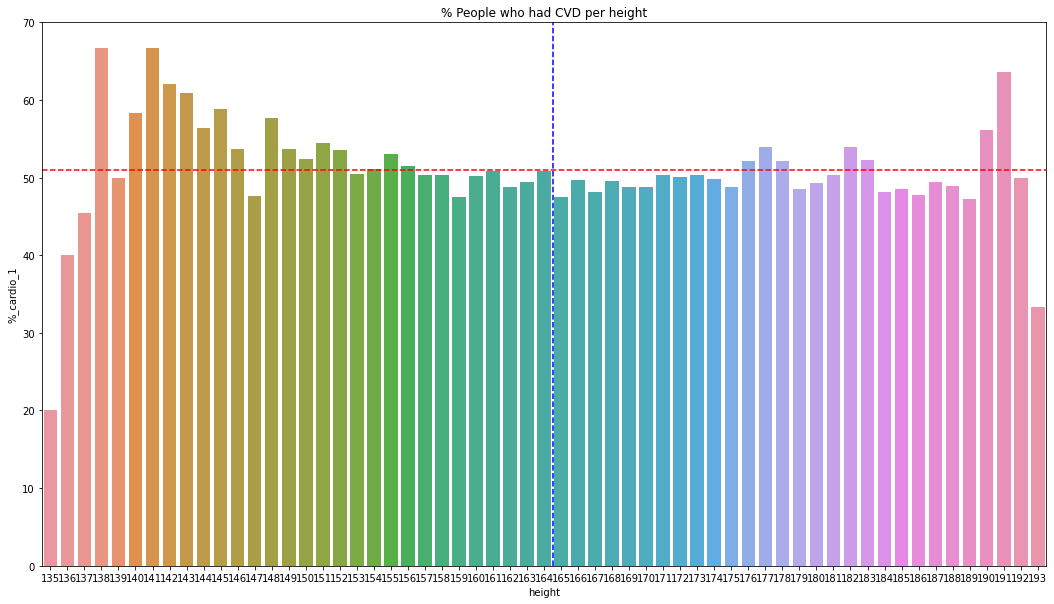

In [136]:
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
#plt.axvline(29.5, 0.0,1.0)
graph = sns.barplot(x='height', y='%_cardio_1', ax=ax, data=aux1)
graph.axvline(29.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(51, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% People who had CVD per height')
plt.show()

In [137]:
#boxplot height+cardio
#aux1 = df3[['height', 'cardio']].groupby('height').sum().reset_index()
#sns.boxplot(x='height', data=aux1)

**3. Men are 30% more likely than women to develop a CVD**

**FALSE** Men had 50,5% of cases of CVD, while women had 49,7%

In [138]:
#transform to categorical
df32 = df3.copy()
df32['gender'] = df32['gender'].apply({1:'women', 2:'men'}.get)

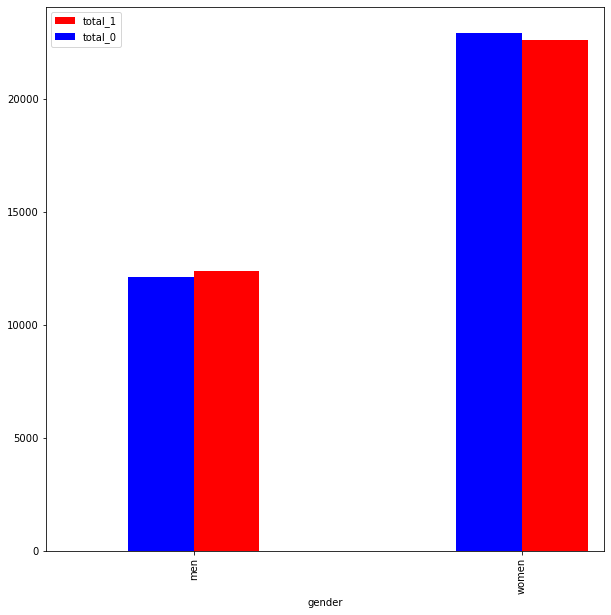

In [139]:
aux1 = df32[(df32['cardio'] >= 1)]
aux1 = aux1[['gender', 'cardio']].groupby('gender').size().reset_index().rename(columns={0:'total_1'})
aux1

aux2 = df32[(df32['cardio'] <= 0)]
aux2 = aux2[['gender', 'cardio']].groupby('gender').size().reset_index().rename(columns={0:'total_0'})
aux2

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='gender', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='gender', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

In [140]:
aux1 = df32[['gender', 'cardio']].groupby(['gender','cardio']).size().reset_index().rename(columns={0:'total'})
aux1

,gender,cardio,total
0,men,0,12107
1,men,1,12363
2,women,0,22914
3,women,1,22616


In [141]:
#calculate % people who had CVD
aux1['%_cardio_1'] = ""

j = len(aux1)
for i in range(len(aux1)):
    i=i+1
    if i < j:
        perc = ((aux1['total'][i])/(aux1['total'][i-1]+aux1['total'][i]))*100
        aux1['%_cardio_1'][i] = perc
    else:
        exit

<ipython-input-141-f57475dde67e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['%_cardio_1'][i] = perc


In [142]:
aux1 = aux1[(aux1['cardio'] >= 1)]

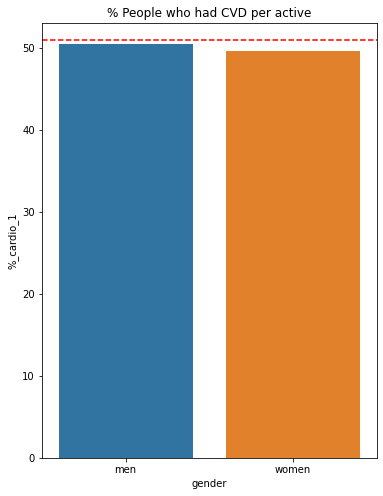

In [143]:
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)
#plt.axvline(29.5, 0.0,1.0)
graph = sns.barplot(x='gender', y='%_cardio_1', ax=ax, data=aux1)
#graph.axvline(29.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(51, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% People who had CVD per active')
plt.show()

In [144]:
aux1

,gender,cardio,total,%_cardio_1
1,men,1,12363,50.5231
3,women,1,22616,49.6727


**4. Between 33 - 130. People over 100 kg (220 lb) have a 40% chance of having a CVD**

**FALSE** On average people with over 100 kg have 25% more chance of having a CVD

<AxesSubplot:xlabel='weight', ylabel='cardio'>

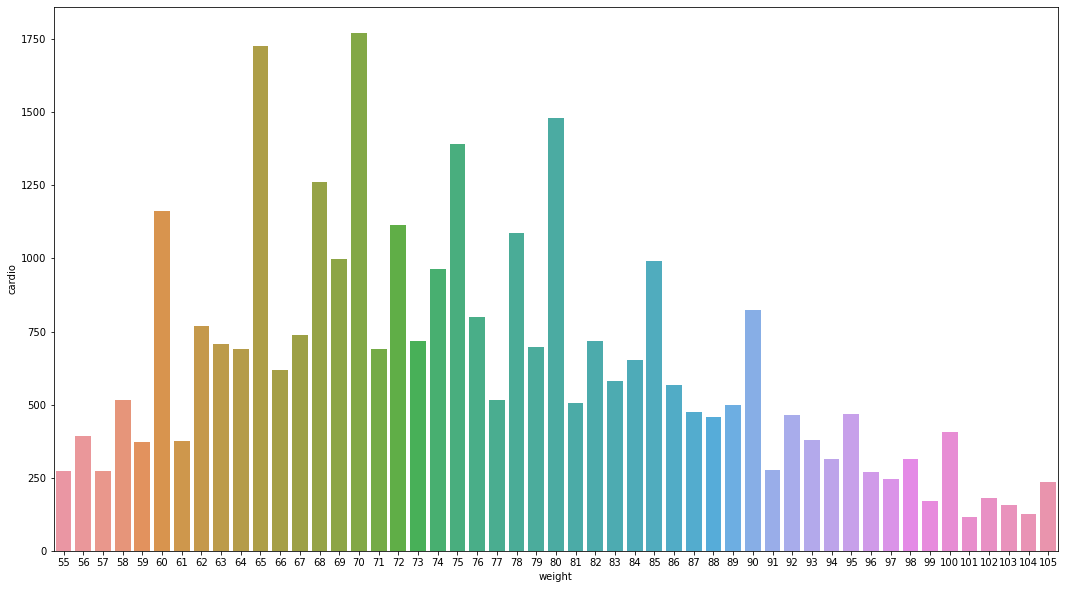

In [145]:
aux1 = df3[(df3['weight'] >= 55) & (df3['weight'] <= 105)]
aux1 = aux1[['weight', 'cardio']].groupby('weight').sum().reset_index()

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='weight', y='cardio', ax=ax, data=aux1)

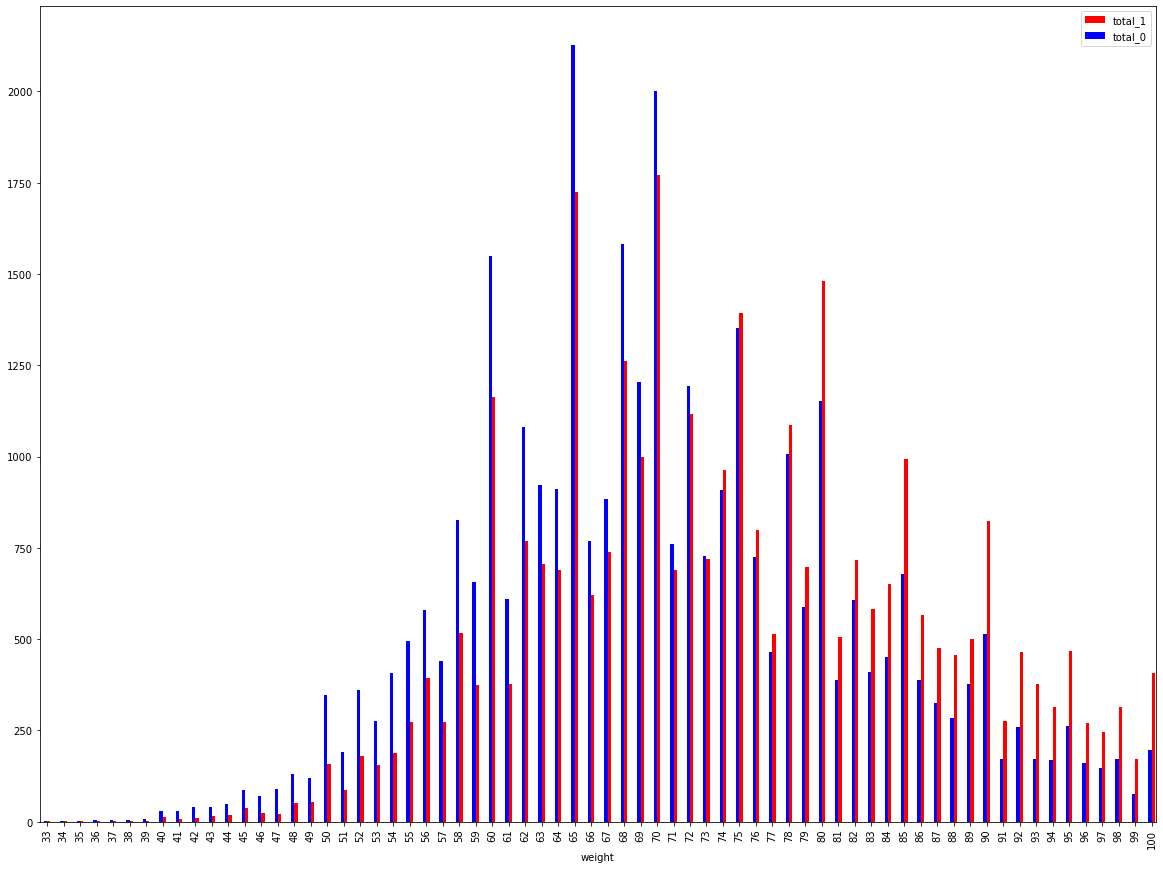

In [146]:
aux1 = df3[(df3['weight'] >= 33) & (df3['weight'] <= 100) & (df3['cardio'] >= 1)]
aux1 = aux1[['weight', 'cardio']].groupby('weight').size().reset_index().rename(columns={0:'total_1'})
aux1

aux2 = df3[(df3['weight'] >= 33) & (df3['weight'] <= 100) & (df3['cardio'] <= 0)]
aux2 = aux2[['weight', 'cardio']].groupby('weight').size().reset_index().rename(columns={0:'total_0'})
aux2

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='weight', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='weight', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

In [147]:
aux1 = df3[(df3['weight'] >= 33) & (df3['weight'] <= 130)]
aux1 = aux1[['weight', 'cardio']].groupby(['weight','cardio']).size().reset_index().rename(columns={0:'total'})
#aux1

In [148]:
#calculate % people who had CVD
aux1['%_cardio_1'] = ""

j = len(aux1)
for i in range(len(aux1)):
    i=i+1
    if i < j:
        perc = ((aux1['total'][i])/(aux1['total'][i-1]+aux1['total'][i]))*100
        aux1['%_cardio_1'][i] = perc
    else:
        exit

<ipython-input-148-f57475dde67e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['%_cardio_1'][i] = perc


In [149]:
aux1 = aux1[(aux1['cardio'] >=1)]
aux_100 = aux1[(aux1['weight'] >= 100)]
aux_100 = pd.DataFrame(aux_100.apply(np.mean)).T

aux_99 = aux1[(aux1['weight'] < 100)]
aux_99 = pd.DataFrame(aux_99.apply(np.mean)).T

m = pd.concat([aux_100, aux_99]).T.reset_index()
m.columns = ['index','over 100','below 100']
m

,index,over 100,below 100
0,weight,115.000000,66.000000
1,cardio,1.000000,1.000000
2,total,80.774194,482.343284
3,%_cardio_1,70.616203,45.422557


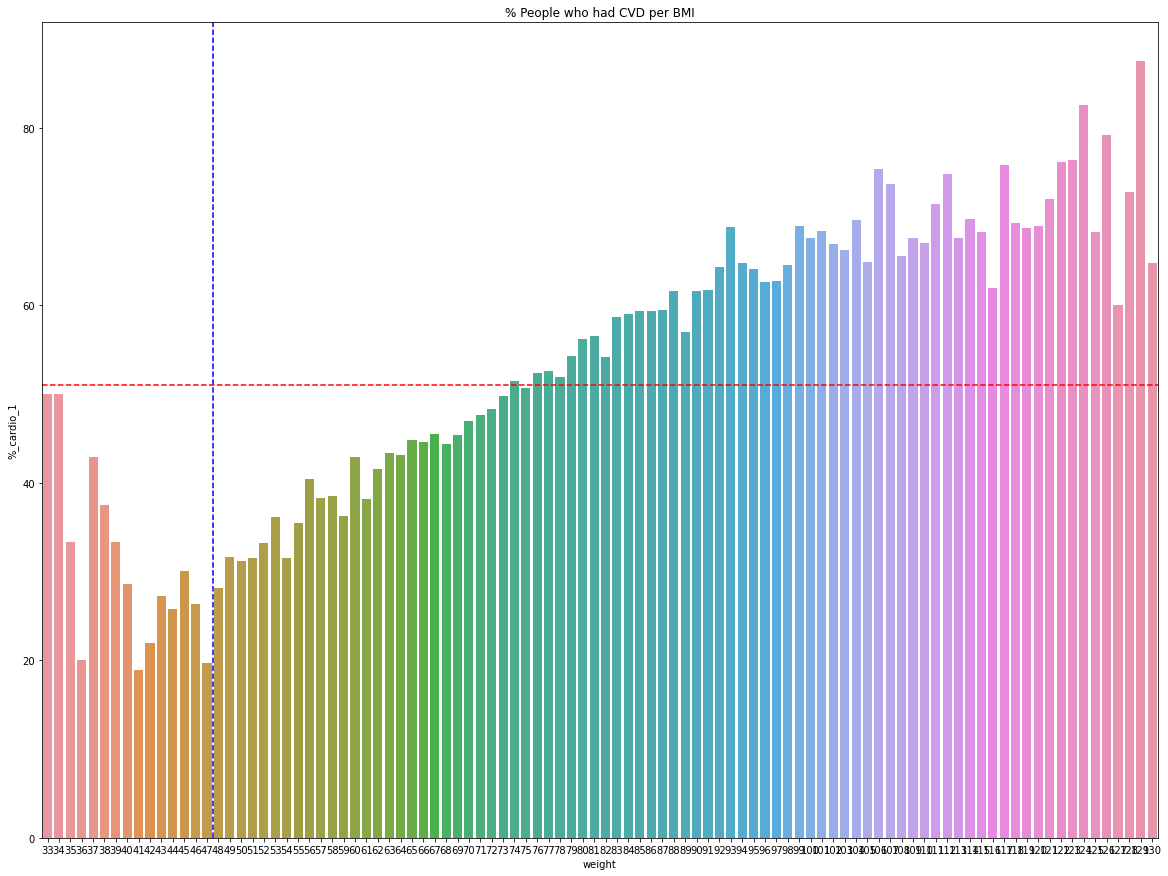

In [150]:
fig_dims = (20,15)
fig, ax = plt.subplots(figsize=fig_dims)
#plt.axvline(29.5, 0.0,1.0)
graph = sns.barplot(x='weight', y='%_cardio_1', ax=ax, data=aux1)
graph.axvline(14.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(51, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% People who had CVD per BMI')
plt.show()

In [151]:
#boxplot weight+cardio
#aux1 = df3[['weight', 'cardio']].groupby('weight').sum().reset_index()
#sns.boxplot(x='weight', data=aux1)

**5. People with a BMI above 30 (obese class I) have a 25% chance of having a CVD**

**FALSE** People with a BMI less than 30 have 72% chance of having CVD

In [152]:
#convert type bmi (int)
df3['bmi'] = df3['bmi'].astype(int)

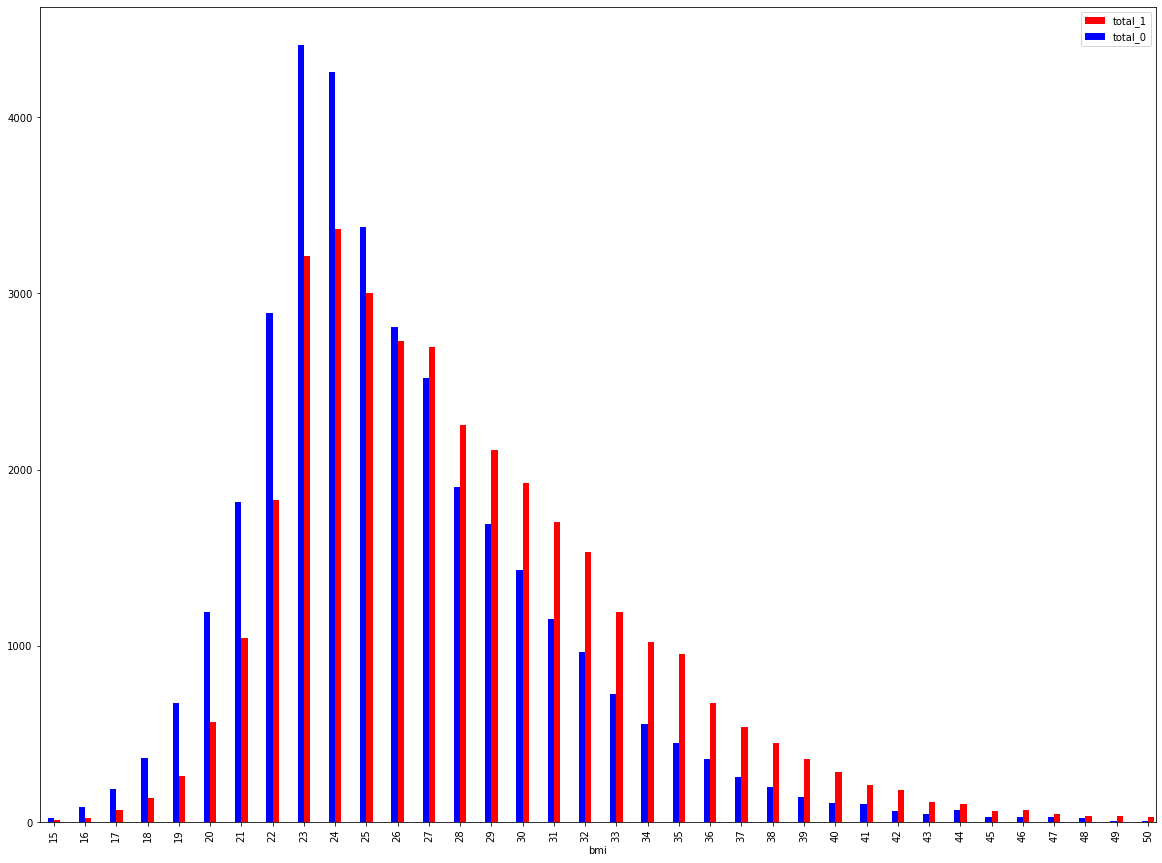

In [153]:
aux1 = df3[(df3['bmi'] >= 15) & (df3['bmi'] <= 50) & (df3['cardio'] >= 1)]
aux1 = aux1[['bmi', 'cardio']].groupby('bmi').size().reset_index().rename(columns={0:'total_1'})
aux1

aux2 = df3[(df3['bmi'] >= 15) & (df3['bmi'] <= 50) & (df3['cardio'] <= 0)]
aux2 = aux2[['bmi', 'cardio']].groupby('bmi').size().reset_index().rename(columns={0:'total_0'})
aux2

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111) # Create matplotlib axes
#ax2 = ax.twinx()

width = 0.2

#aux1.set_index(['cardio','bmi']).plot.bar(figsize=(20,10))
aux1.plot(x='bmi', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='bmi', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()
#fig_dims = (18, 10)
#fig, ax = plt.subplots(figsize=fig_dims)
#sns.barplot(x='bmi', y='total', ax=ax, data=aux1)

In [154]:
aux1 = df3[(df3['bmi'] >= 15) & (df3['bmi'] <= 50)]
aux1 = aux1[['bmi', 'cardio']].groupby(['bmi','cardio']).size().reset_index().rename(columns={0:'total'})
#aux1

In [155]:
#calculate % people who had CVD
aux1['%_cardio_1'] = ""

j = len(aux1)
for i in range(len(aux1)):
    i=i+1
    if i < j:
        perc = ((aux1['total'][i])/(aux1['total'][i-1]+aux1['total'][i]))*100
        aux1['%_cardio_1'][i] = perc
    else:
        exit

<ipython-input-155-f57475dde67e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['%_cardio_1'][i] = perc


In [156]:
aux1 = aux1[(aux1['cardio'] >=1)]
aux_30 = aux1[(aux1['bmi'] >= 30)]
aux_30 = pd.DataFrame(aux_30.apply(np.mean)).T
aux_30

aux_29 = aux1[(aux1['bmi'] < 30)]
aux_29 = pd.DataFrame(aux_29.apply(np.mean)).T
aux_29

m = pd.concat([aux_30, aux_29]).T.reset_index()
m.columns = ['index','over 30','above 30']
m

,index,over 30,above 30
0,bmi,40.000000,22.000000
1,cardio,1.000000,1.000000
2,total,548.523810,1554.333333
3,%_cardio_1,67.455018,39.083668


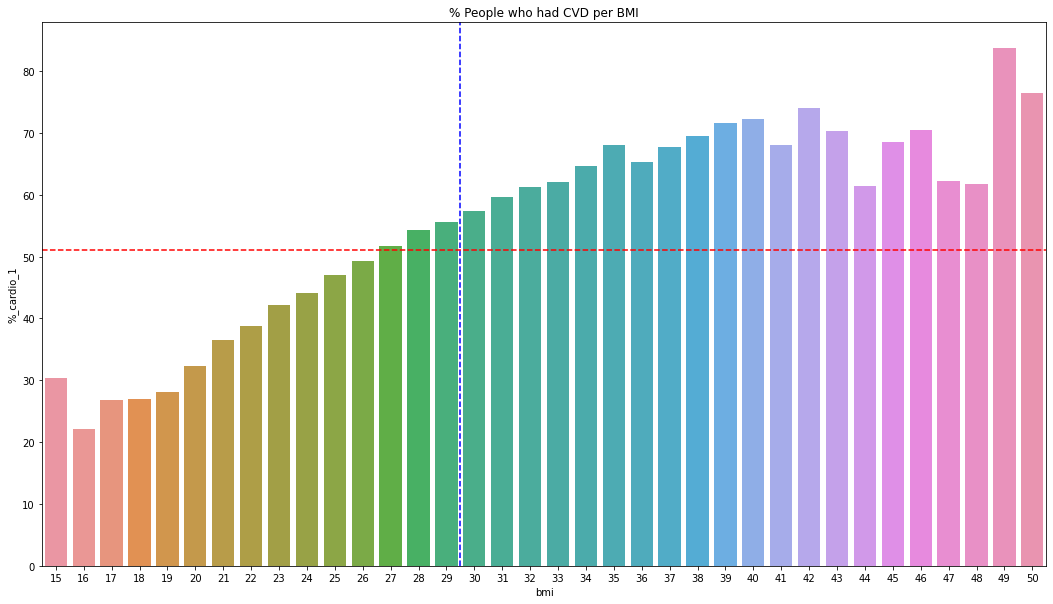

In [157]:
fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
#plt.axvline(29.5, 0.0,1.0)
graph = sns.barplot(x='bmi', y='%_cardio_1', ax=ax, data=aux1)
graph.axvline(14.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(51, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% People who had CVD per BMI')
plt.show()

In [158]:
#boxplot bmi+cardio
#aux1 = df3[['bmi', 'cardio']].groupby('bmi').sum().reset_index()
#sns.boxplot(x='bmi', data=aux1)

**6. People who do not engage in physical activity are 40% more likely to have CVDs**

In [159]:
#transform to categorical
df32 = df3.copy()
df32['active'] = df32['active'].apply({0:'no', 1:'yes'}.get)

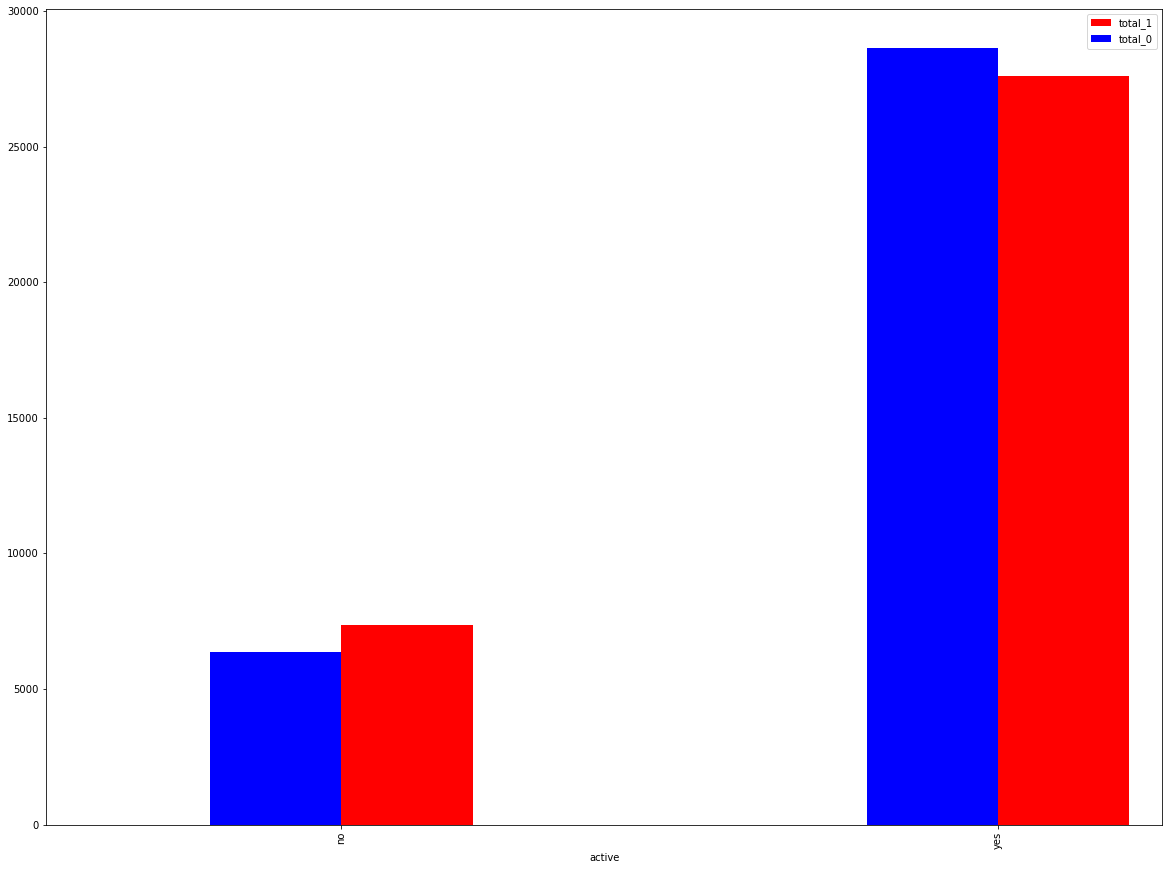

In [160]:
aux1 = df32[(df32['cardio'] >= 1)]
aux1 = aux1[['active', 'cardio']].groupby('active').size().reset_index().rename(columns={0:'total_1'})
aux1

aux2 = df32[(df32['cardio'] <= 0)]
aux2 = aux2[['active', 'cardio']].groupby('active').size().reset_index().rename(columns={0:'total_0'})
aux2

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='active', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='active', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

In [161]:
aux1 = df3[['active', 'cardio']].groupby(['active','cardio']).size().reset_index().rename(columns={0:'total'})
aux1

,active,cardio,total
0,0,0,6378
1,0,1,7361
2,1,0,28643
3,1,1,27618


In [162]:
#calculate % people who had CVD
aux1['%_cardio_1'] = ""

j = len(aux1)
for i in range(len(aux1)):
    i=i+1
    if i < j:
        perc = ((aux1['total'][i])/(aux1['total'][i-1]+aux1['total'][i]))*100
        aux1['%_cardio_1'][i] = perc
    else:
        exit

<ipython-input-162-f57475dde67e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['%_cardio_1'][i] = perc


In [163]:
aux1 = aux1[(aux1['cardio'] >= 1)]

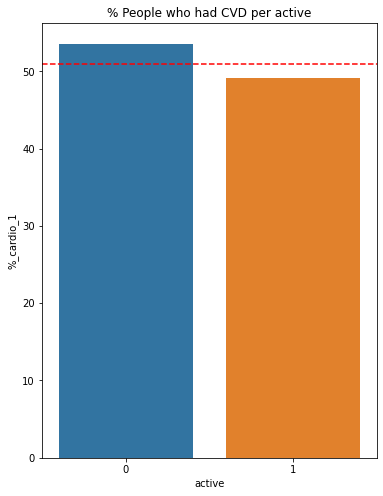

In [164]:
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)
#plt.axvline(29.5, 0.0,1.0)
graph = sns.barplot(x='active', y='%_cardio_1', ax=ax, data=aux1)
#graph.axvline(29.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(51, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% People who had CVD per active')
plt.show()

In [165]:
aux1

,active,cardio,total,%_cardio_1
1,0,1,7361,53.5774
3,1,1,27618,49.0891


**7. People who regularly consume alcohol have a 10% chance of having CVD**

In [166]:
#transform to categorical
df32 = df3.copy()
df32['alco'] = df32['alco'].apply({0:'no', 1:'yes'}.get)

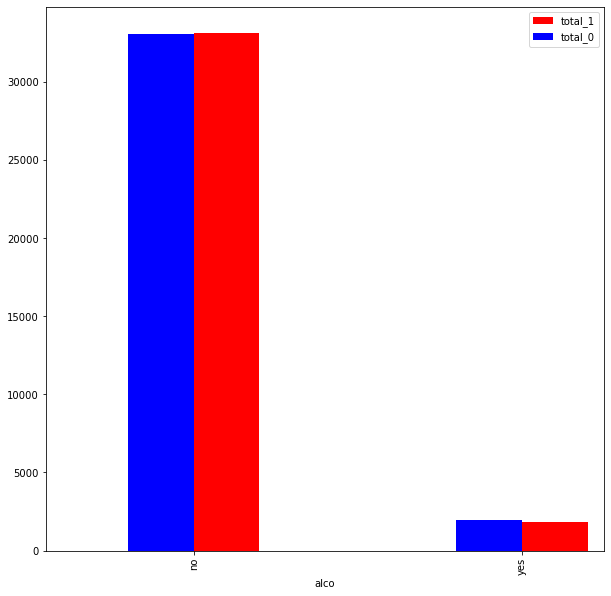

In [167]:
aux1 = df32[(df32['cardio'] >= 1)]
aux1 = aux1[['alco', 'cardio']].groupby('alco').size().reset_index().rename(columns={0:'total_1'})
aux1

aux2 = df32[(df32['cardio'] <= 0)]
aux2 = aux2[['alco', 'cardio']].groupby('alco').size().reset_index().rename(columns={0:'total_0'})
aux2

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='alco', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='alco', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

In [168]:
aux1 = df32[['alco', 'cardio']].groupby(['alco','cardio']).size().reset_index().reset_index().rename(columns={0:'total'})
aux1

,index,alco,cardio,total
0,0,no,0,33080
1,1,no,1,33156
2,2,yes,0,1941
3,3,yes,1,1823


In [169]:
#calculate % people who had CVD
aux1['%_cardio_1'] = ""

j = len(aux1)
for i in range(len(aux1)):
    i=i+1
    if i < j:
        perc = ((aux1['total'][i])/(aux1['total'][i-1]+aux1['total'][i]))*100
        aux1['%_cardio_1'][i] = perc
    else:
        exit

<ipython-input-169-f57475dde67e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['%_cardio_1'][i] = perc


In [170]:
aux1 = aux1[(aux1['cardio'] >= 1)]

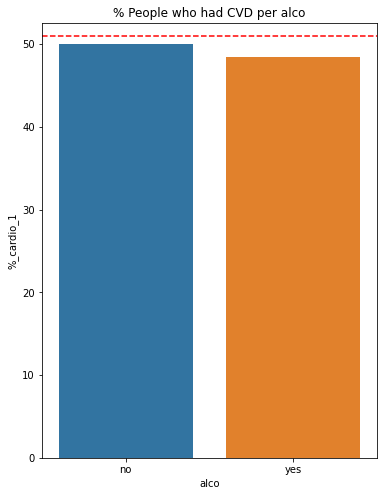

In [171]:
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)
#plt.axvline(29.5, 0.0,1.0)
graph = sns.barplot(x='alco', y='%_cardio_1', ax=ax, data=aux1)
#graph.axvline(29.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(51, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% People who had CVD per alco')
plt.show()

In [172]:
aux1

,index,alco,cardio,total,%_cardio_1
1,1,no,1,33156,50.0574
3,3,yes,1,1823,48.4325


**8. People who smoke are 20% more likely to have CVD**

In [173]:
#transform to categorical
df32 = df3.copy()
df32['smoke'] = df32['smoke'].apply({0:'no', 1:'yes'}.get)

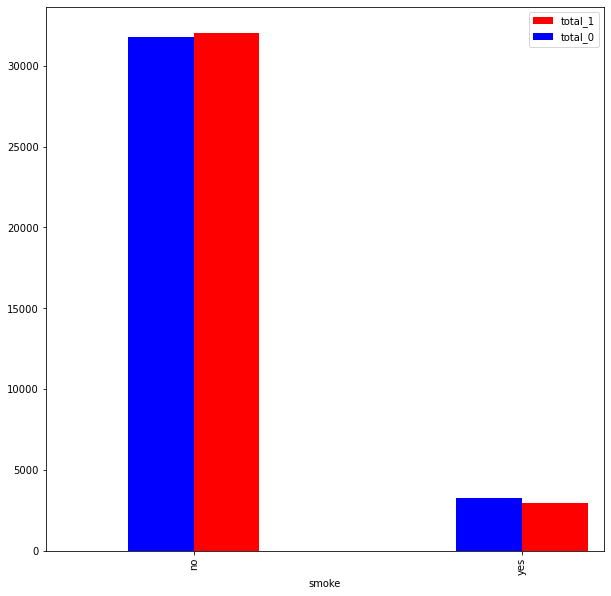

In [174]:
aux1 = df32[(df32['cardio'] >= 1)]
aux1 = aux1[['smoke', 'cardio']].groupby('smoke').size().reset_index().rename(columns={0:'total_1'})
aux1

aux2 = df32[(df32['cardio'] <= 0)]
aux2 = aux2[['smoke', 'cardio']].groupby('smoke').size().reset_index().rename(columns={0:'total_0'})
aux2

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='smoke', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='smoke', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

In [175]:
aux1 = df32[['smoke', 'cardio']].groupby(['smoke','cardio']).size().reset_index().rename(columns={0:'total'})
aux1

,smoke,cardio,total
0,no,0,31781
1,no,1,32050
2,yes,0,3240
3,yes,1,2929


In [176]:
#calculate % people who had CVD
aux1['%_cardio_1'] = ""

j = len(aux1)
for i in range(len(aux1)):
    i=i+1
    if i < j:
        perc = ((aux1['total'][i])/(aux1['total'][i-1]+aux1['total'][i]))*100
        aux1['%_cardio_1'][i] = perc
    else:
        exit

<ipython-input-176-f57475dde67e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['%_cardio_1'][i] = perc


In [177]:
aux1 = aux1[(aux1['cardio'] >= 1)]

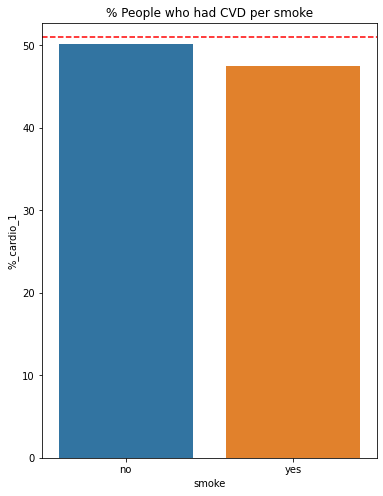

In [178]:
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)
#plt.axvline(29.5, 0.0,1.0)
graph = sns.barplot(x='smoke', y='%_cardio_1', ax=ax, data=aux1)
#graph.axvline(29.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(51, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% People who had CVD per smoke')
plt.show()

In [179]:
aux1

,smoke,cardio,total,%_cardio_1
1,no,1,32050,50.2107
3,yes,1,2929,47.4793


**9. People who have well above normal cholesterol have a 50% chance of having CVD**

In [180]:
#transform to categorical
df32 = df3.copy()
df32['cholesterol'] = df32['cholesterol'].apply({1:'normal', 2:'above normal', 3:'well above normal'}.get)

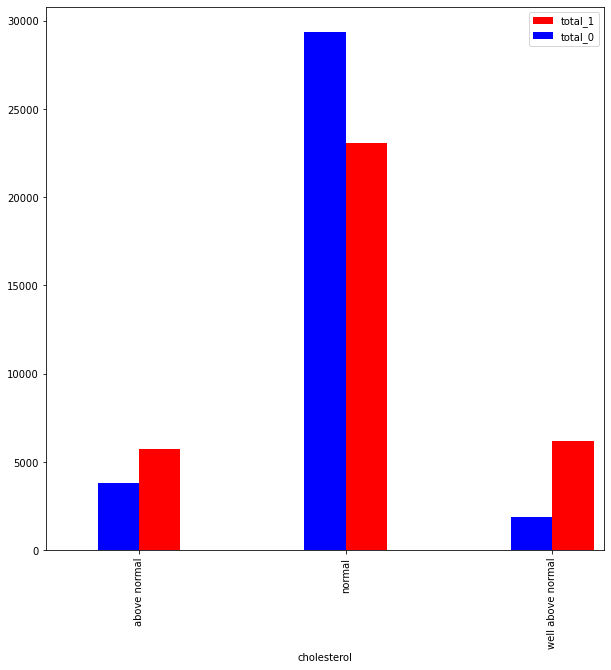

In [181]:
aux1 = df32[(df32['cardio'] >= 1)]
aux1 = aux1[['cholesterol', 'cardio']].groupby('cholesterol').size().reset_index().rename(columns={0:'total_1'})
aux1

aux2 = df32[(df32['cardio'] <= 0)]
aux2 = aux2[['cholesterol', 'cardio']].groupby('cholesterol').size().reset_index().rename(columns={0:'total_0'})
aux2

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='cholesterol', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='cholesterol', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

In [182]:
aux1 = df32[['cholesterol', 'cardio']].groupby(['cholesterol','cardio']).size().reset_index().rename(columns={0:'total'})
aux1

,cholesterol,cardio,total
0,above normal,0,3799
1,above normal,1,5750
2,normal,0,29330
3,normal,1,23055
4,well above normal,0,1892
5,well above normal,1,6174


In [183]:
#calculate % people who had CVD
aux1['%_cardio_1'] = ""

j = len(aux1)
for i in range(len(aux1)):
    i=i+1
    if i < j:
        perc = ((aux1['total'][i])/(aux1['total'][i-1]+aux1['total'][i]))*100
        aux1['%_cardio_1'][i] = perc
    else:
        exit

<ipython-input-183-f57475dde67e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['%_cardio_1'][i] = perc


In [184]:
aux1 = aux1[(aux1['cardio'] >= 1)]

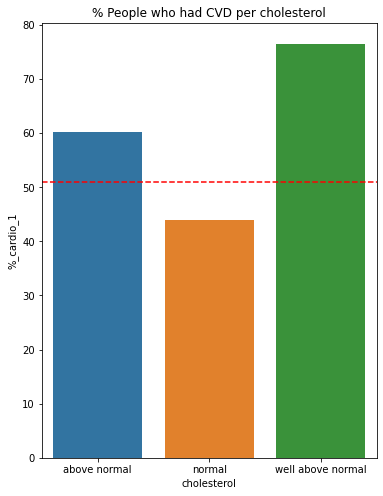

In [185]:
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)
#plt.axvline(29.5, 0.0,1.0)
graph = sns.barplot(x='cholesterol', y='%_cardio_1', ax=ax, data=aux1)
#graph.axvline(29.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(51, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% People who had CVD per cholesterol')
plt.show()

In [186]:
aux1

,cholesterol,cardio,total,%_cardio_1
1,above normal,1,5750,60.2157
3,normal,1,23055,44.0107
5,well above normal,1,6174,76.5435


**10. People who have well above normal glucose have a 20% chance of having CVD**

In [187]:
#transform to categorical
df32 = df3.copy()
df32['gluc'] = df32['gluc'].apply({1:'normal', 2:'above normal', 3:'well above normal'}.get)

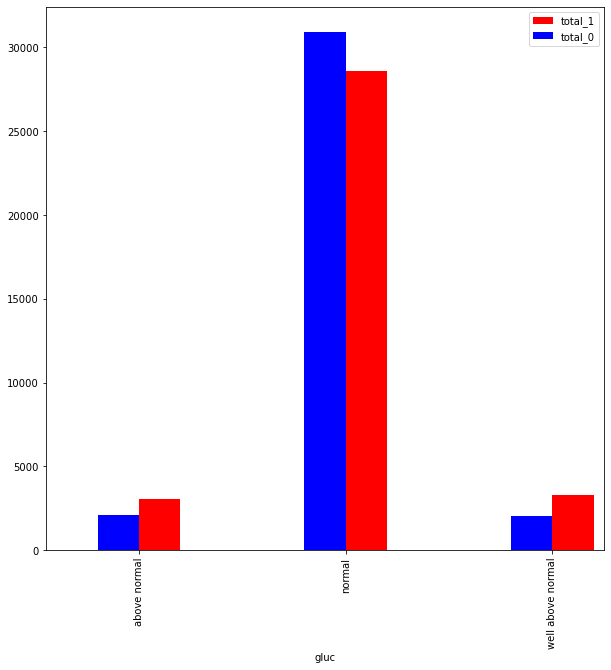

In [188]:
aux1 = df32[(df32['cardio'] >= 1)]
aux1 = aux1[['gluc', 'cardio']].groupby('gluc').size().reset_index().rename(columns={0:'total_1'})
aux1

aux2 = df32[(df32['cardio'] <= 0)]
aux2 = aux2[['gluc', 'cardio']].groupby('gluc').size().reset_index().rename(columns={0:'total_0'})
aux2

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='gluc', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='gluc', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

In [189]:
aux1 = df32[['gluc', 'cardio']].groupby(['gluc','cardio']).size().reset_index().rename(columns={0:'total'})
aux1

,gluc,cardio,total
0,above normal,0,2112
1,above normal,1,3078
2,normal,0,30894
3,normal,1,28585
4,well above normal,0,2015
5,well above normal,1,3316


In [190]:
#calculate % people who had CVD
aux1['%_cardio_1'] = ""

j = len(aux1)
for i in range(len(aux1)):
    i=i+1
    if i < j:
        perc = ((aux1['total'][i])/(aux1['total'][i-1]+aux1['total'][i]))*100
        aux1['%_cardio_1'][i] = perc
    else:
        exit

<ipython-input-190-f57475dde67e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['%_cardio_1'][i] = perc


In [191]:
aux1 = aux1[(aux1['cardio'] >= 1)]

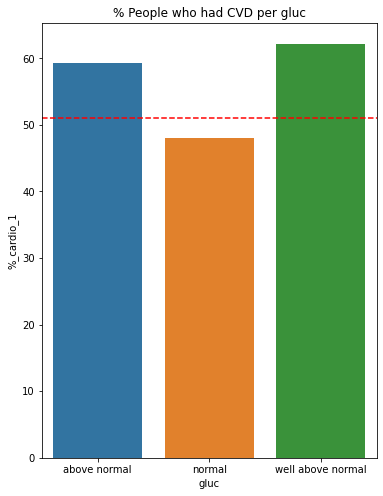

In [192]:
fig_dims = (6, 8)
fig, ax = plt.subplots(figsize=fig_dims)
#plt.axvline(29.5, 0.0,1.0)
graph = sns.barplot(x='gluc', y='%_cardio_1', ax=ax, data=aux1)
#graph.axvline(29.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(51, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% People who had CVD per gluc')
plt.show()

In [193]:
aux1

,gluc,cardio,total,%_cardio_1
1,above normal,1,3078,59.3064
3,normal,1,28585,48.059
5,well above normal,1,3316,62.2022


**11. People who hypertension have a 40% chance of having CVD**

**TRUE** On average have 50% chance of having a CVD

In [194]:
#aux1 = df3[(df3['blood_pressure'] == '')]
#aux1

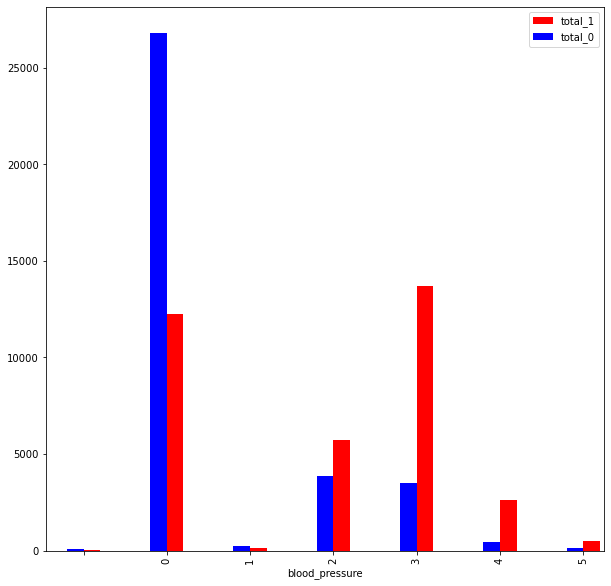

In [195]:
aux1 = df3[(df3['cardio'] >= 1)]
aux1 = aux1[['blood_pressure', 'cardio']].groupby('blood_pressure').size().reset_index().rename(columns={0:'total_1'})
aux1

aux2 = df3[(df3['cardio'] <= 0)]
aux2 = aux2[['blood_pressure', 'cardio']].groupby('blood_pressure').size().reset_index().rename(columns={0:'total_0'})
aux2

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)

width = 0.2

aux1.plot(x='blood_pressure', y='total_1', kind='bar', color='red', ax=ax, width=width, position=0)
aux2.plot(x='blood_pressure', y='total_0', kind='bar', color='blue', ax=ax, width=width, position=1)
plt.show()

In [196]:
aux1 = df3[['blood_pressure', 'cardio']].groupby(['blood_pressure','cardio']).size().reset_index().rename(columns={0:'total'})
aux1

,blood_pressure,cardio,total
0,,0,102
1,,1,51
2,0,0,26809
3,0,1,12248
4,1,0,215
5,1,1,123
6,2,0,3854
7,2,1,5733
8,3,0,3478
9,3,1,13717


In [197]:
#calculate % people who had CVD
aux1['%_cardio_1'] = ""

j = len(aux1)
for i in range(len(aux1)):
    i=i+1
    if i < j:
        perc = ((aux1['total'][i])/(aux1['total'][i-1]+aux1['total'][i]))*100
        aux1['%_cardio_1'][i] = perc
    else:
        exit

<ipython-input-197-f57475dde67e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux1['%_cardio_1'][i] = perc


In [198]:
aux1 = aux1[(aux1['cardio'] >= 1)]

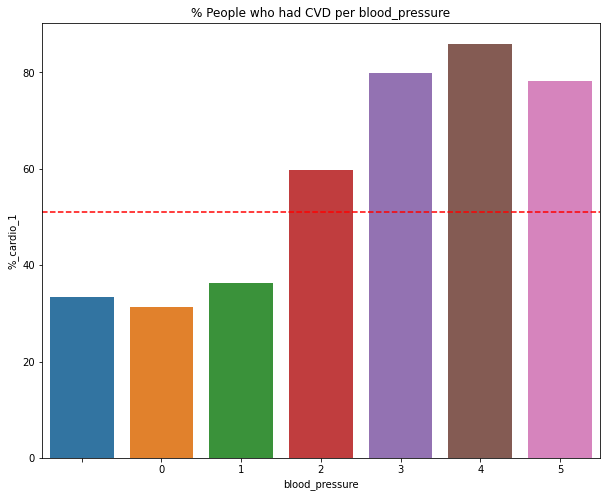

In [199]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
#plt.axvline(29.5, 0.0,1.0)
graph = sns.barplot(x='blood_pressure', y='%_cardio_1', ax=ax, data=aux1)
#graph.axvline(29.5, ymin=0.0, ymax=1.0, linestyle ="--", color='blue')
graph.axhline(51, xmin=0.0, xmax=1.0, linestyle ="--", color='red')
plt.title('% People who had CVD per blood_pressure')
plt.show()

In [200]:
aux1

,blood_pressure,cardio,total,%_cardio_1
1,,1,51,33.3333
3,0,1,12248,31.3593
5,1,1,123,36.3905
7,2,1,5733,59.7997
9,3,1,13717,79.7732
11,4,1,2630,85.9477
13,5,1,477,78.1967


## 3.3. Multivariate Analysis

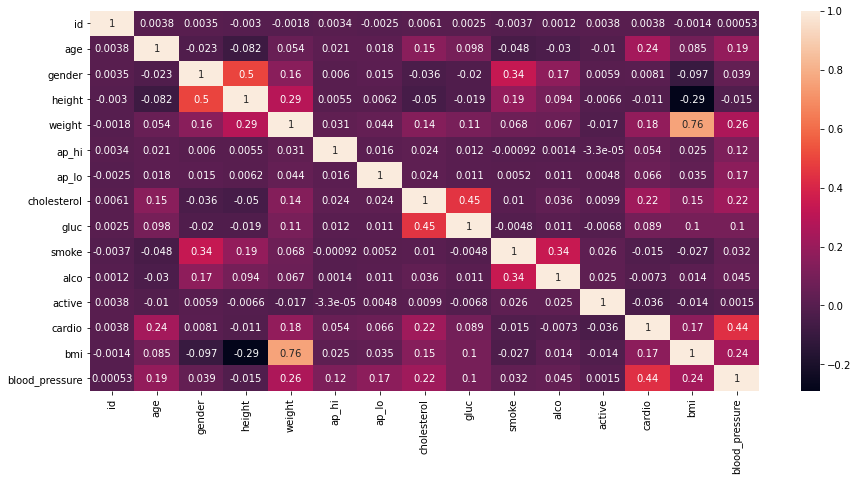

In [221]:
correlations = df3.corr(method='pearson')
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(correlations,ax=ax, annot=True);